# ElasticNet Regression in Python

ElasticNet regularization applies both L1-norm and L2-norm regularization to penalize the coefficients in a regression model. We will use sklearn's ElasticNet and ElasticNetCV models to analyze regression data. The steps are- 1.Preparing data,2.Best alpha, 3.Defining model and checking the results, and 4.Cross-validation with ElasticNetCV

Importing necessary libraries

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Preparing data

We use Boston house-price dataset as regression data. After loading the dataset, first, we will separate it into the x - feature and y - label, then split into the train and test parts. Here, we will extract 15 percent of the dataset as test data.

In [25]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

Best Alpha

To figure out what alpha value is good for our model, we'll define multiple values and check the performance accuracy.

In [26]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

We define ElasticNet model by setting alpha and train it with x and y data. Then, we'll check the R-squared, MSE, and RMSE metrics for each alpha.

In [27]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(x,y)   
    score = model.score(x, y)
    pred_y = model.predict(x)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.74, MSE:21.90, RMSE:4.68
Alpha:0.0010, R2:0.74, MSE:21.92, RMSE:4.68
Alpha:0.0100, R2:0.74, MSE:22.32, RMSE:4.72
Alpha:0.1000, R2:0.73, MSE:23.16, RMSE:4.81
Alpha:0.3000, R2:0.71, MSE:24.08, RMSE:4.91
Alpha:0.5000, R2:0.71, MSE:24.85, RMSE:4.99
Alpha:0.7000, R2:0.70, MSE:25.55, RMSE:5.05
Alpha:1.0000, R2:0.69, MSE:26.50, RMSE:5.15


The result shows that we can use 0.01 value for our model.

Defining model and checking the results

Now, we can define ElasticNet regression model with an alpha value taken above and fit it with xtrain and ytrain data. Then we'll predict xtest data and check the model accuracy.

In [28]:
elastic=ElasticNet(alpha=0.01).fit(xtrain, ytrain)
ypred = elastic.predict(xtest)
score = elastic.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.715, MSE:27.38, RMSE:5.23


Visualizing the model in a plot

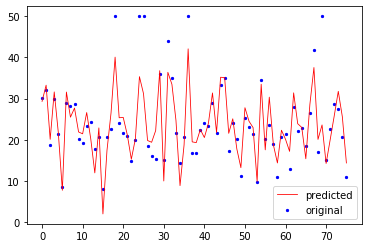

In [29]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Cross-validation with ElasticNetCV

ElasticNetCV is a cross-validation class that can search multiple alpha values and applies the best one. We'll define the model with alphas value and fit it with xtrain and ytrain data.

In [33]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
model = elastic_cv.fit(xtrain, ytrain)
print(model.alpha_)
print(model.intercept_)

0.0001
39.19010495331448


We can predict xtest data and check the accuracy metrics.

In [31]:
ypred = model.predict(xtest)
score = model.score(xtest, ytest)
mse = mean_squared_error(ytest, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.718, MSE:27.07, RMSE:5.20


Visualizing the cross validation model

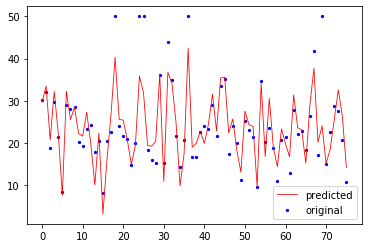

In [32]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()